# Zaawansowane Metody Inteligencji Obliczeniowej

## Ćwiczenie: Stochastic Gradient Descent

Celem tego ćwiczenia jest przyswojenie podstaw algorytmu Gradient Descent,
regresji liniowej/logistycznej i sieci neuronowych.
Ten notebook używa pewnych funkcji pomocniczych z pliku [zmio_sgd_helpers.py](zmio_sgd_helpers.py), lecz nie trzeba tam zaglądać.

Ćwiczenie wymaga dodatkowych pakietów: **numpy**, **matplotlib**, **seaborn**, **pytorch**.


In [3]:
# linia potrzebna do rysowania wykresów
# możesz ją zignorować, lecz odpal ten kod.
%matplotlib inline

# importy dodatkowych funkcji i pakietów
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(precision = 3)

Stwórz dane dla regresji liniowej za pomocą dpstarczonej funkcji.
x jest zbiorem obiektów z cechami (po jednej cesze dla obiektu w tym prostym przypadku). y Zawiera wartości, które chcemy przewidzieć na podstawie y.

In [4]:
from zmio_sgd_helpers import generate_1d_regression_data

x, y = generate_1d_regression_data()

Zobacz jak wyglądają dane


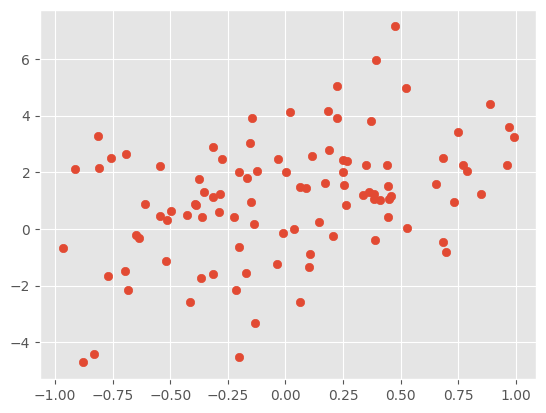

In [5]:
plt.scatter(x, y)

## Zadanie 1
Twoim pierwszym zadaniem zaimplementowanie regresji liniowej (1-wymiarowej) dla średniego błędu kwadratowego:

$$ argmin_{a,b \in R } \frac{1}{2n}\sum\limits_{i=0}^{n-1}(ax + b - y)^2$$

Zauważ, że wektory wejściowe są 1-wymiarowe (są skalarami), ale problem optymalizacji jest 2-wymiarowy - optymalizujemy względem
współczynnika nachylenia prostej **a** i wyrazu wolnego **b** (ang. bias term/intercept term)

Zaimplementuj:
* Rozwiązanie analityczne
* Gradient Descent
* Online Stochastic Gradient Descent
* Mini-batch Stochastic Gradient Descent

Twoja implementacja powinna zwracać listę par (a,b), które zostały napotkane przez algorytm w czasie kolejnych iteracji.
Będzie to przydatne dla gotowych już funkcji wizualizacji:

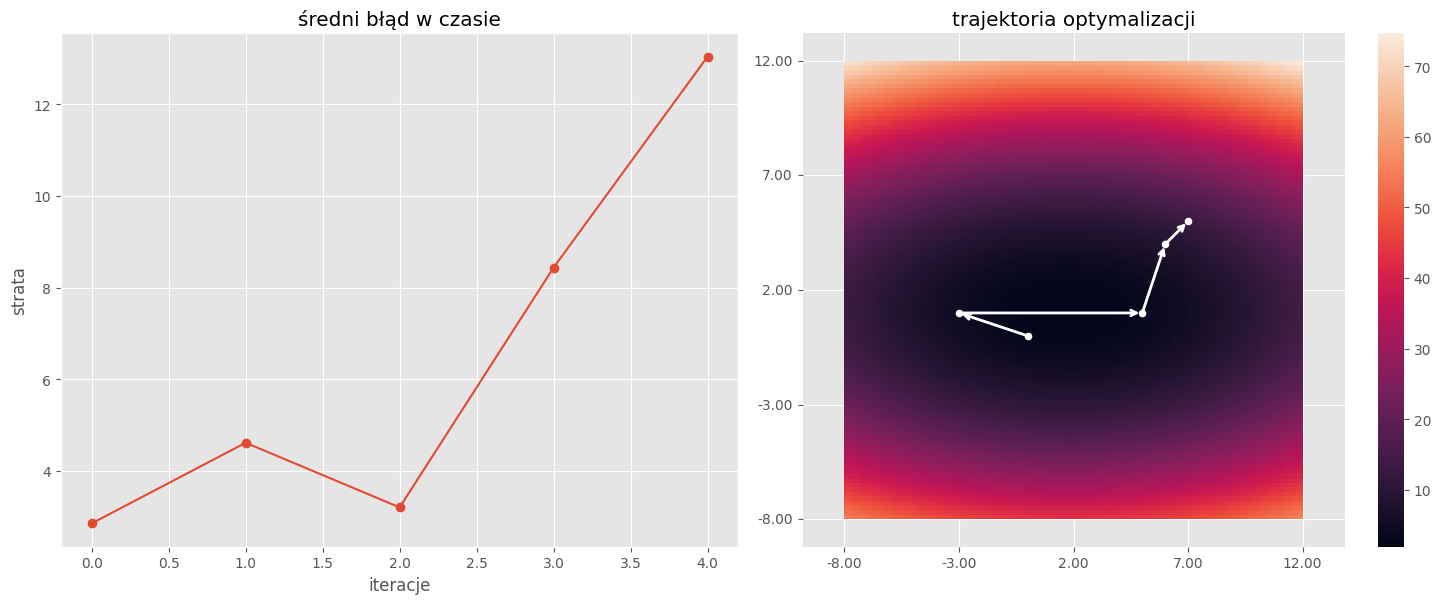

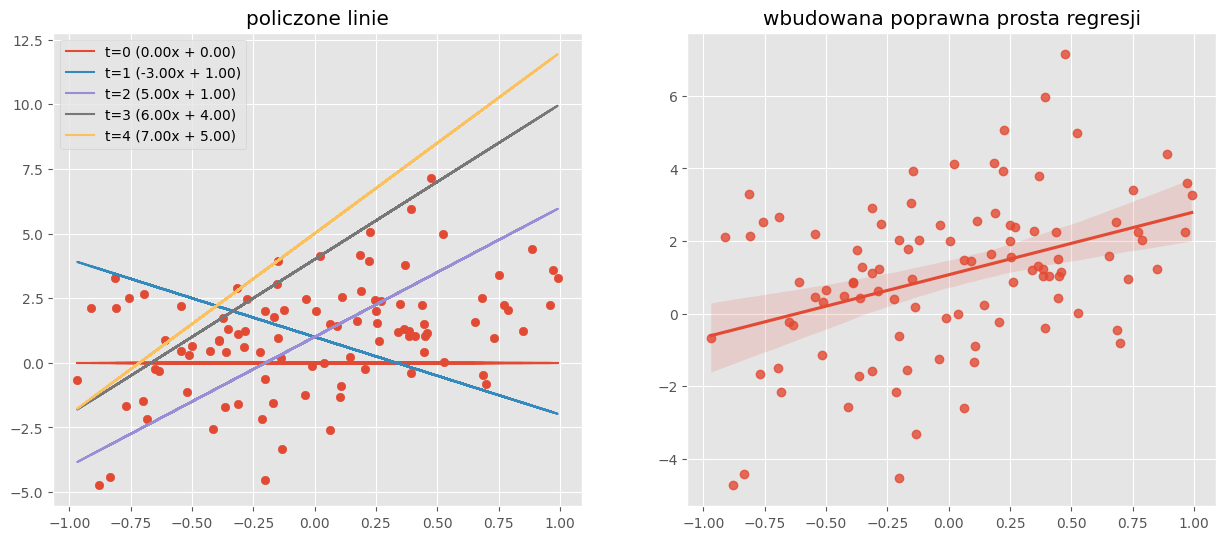

In [6]:
from zmio_sgd_helpers import plot_1d_regression_path, plot_1d_regression_lines


#przykładowe pary rozwiązań:
sample_points = [(0,0),(-3,1),(5,1),(6,4),(7,5)]

#eysowanie ścieżki po jakiej poruszał się algorytm w przestrzeni parametrów i błąd w czasie
plot_1d_regression_path(x, y, sample_points)

#uzyskane proste regresji
plot_1d_regression_lines(x, y, sample_points)

Przetestuj różne: liczby iteracji, wielkości mini-batchy, punkty początkowe i prędkości uczenia. Sugerowane parametry do przetestowania:
 początkowe wagi: $(0,0)$, $\alpha_0 = 0.1$, 5 iteracji, rozmiary mini-batchy $
\{5,10,20\}$

In [ ]:
def exact_solution_1d(x, y):
    # implementacja tutaj
    n = len(x)


In [ ]:
def online_sgd_1d(x, y, epochs, w0, b0,  alpha):
    # implementacja tutaj
    raise NotImplementedError

In [ ]:
def mini_batch_sgd_1d(x, y, epochs, w0, b0, batchsize, alpha):
    # implementacja tutaj
    raise NotImplementedError

In [ ]:
def gd_1d(x, y, epochs, w0, b0, alpha):
    # implementacja tutaj
    raise NotImplementedError

# Zadanie 2
Tym razem rozwiąż regresją liniową dla problemu o większym wymiarze.
Nie używaj pętli tam gdzie nie jest to konieczne - użyj operacji macierzowych i wbudowanych funkcji macierzowych (sum, mean itd.).
Uwaga: pętle do iteracji po danych będą konieczne.

Funkcja generująca dane, robi to wedle deterministycznego modelu liniowego, którego parametry są zwracane razem z danymi
(a_model i b_model) zatem możesz porównać wyniki (powoduje to też, że minimalny błąd to 0).

In [ ]:
from zmio_sgd_helpers import generate_regression_data
x, y, a_model, b_model = generate_regression_data()

## Rozwiąż regresję w sposób dokładny analitycznie:

In [ ]:
def mse_error(x, y, W, b):
    raise NotImplementedError()

def exact_solution(x,y):
    W, b = None, None
    #implementacja
    raise NotImplementedError()

In [ ]:
w_exact, b_exact = exact_solution(x,y)
print("Błąd rozwiązania dokładnego (powinien wynieść ~0): {:0.5f}".format( mse_error(x,y,w_exact,b_exact)))

## Twoja implementacja:
Możesz zacząć od 100 iteracji, zerowego rozwiązania początkowego, wielkości mini-batchy 20 i prędkości uczenia $\eta= 0.01$
Spróbuj pozmieniać parametry (i dodać spadającą prędkość uczenia) by uzyskać jak najlepszy wynik.

In [ ]:
def sgd(x, y):
    W, b = None, None
    errors = []
    #implementacja
    raise NotImplementedError()

In [ ]:
W, b, errors = sgd(x, y)
plt.plot(errors)
print("Błąd ostateczny sgd: {:0.5f}".format(mse_error(x, y, W, b)))
print("Rozwiązanie sgd: ", W, b)
print("Rozwiązanie dokładne: ", W, b)

# Mnist
Jednym z najbardziej typowych zbiorów danych by zapoznać się z problemem klasyfikacji jest MNIST.
jest to zbiór obrazków ręcznie narysowanych cyfr. Obrazki są w odcieniach szarości i mają rozmiary 28x28 pikseli.
Poniższy kod ściągnie (chyba, że dane już zostały pobrane wcześniej) zbiór do katalogu **mnist data** i wyświetli przykładową  cyfrę.

In [ ]:
from torchvision import datasets

mnist = datasets.MNIST("mnist_data", download=True)
images = np.array(mnist.data)
labels = np.array(mnist.targets)

random_integer = np.random.randint(0, len(mnist))
image, label = images[random_integer], labels[random_integer]
print("Powinniście zobaczyć cyfrę: {}".format(label))
plt.imshow(image)
plt.show()


# Zadanie 3
Zaimplementuj regresję logistyczną na zbiorze Mnist dla klasyfikacji binarnej (wybierz dwie klasy np. 0 i 1).

Każde zdjęć to obrazek, a wejściem dla regresji logistycznej jest zbiór wektorów (macierz), musimy zatem spłaszczyć obrazki do postaci wektorów długości 28x28=784.

Metoda spadku wzdłuż gradientu minimalizuje **funkcję straty** (ang. loss), lecz docelowo intereuje nas coś innego np. trafność predykcji (ang. accuracy),
czyli jak często algorytm przewidział dobrą klasę (czy wiesz czemu nie używamy trafności do uczenia?).
Poza błędem licz też średnią trafność predykcji w każdej iteracji.

Przydatne funkcje:
* funkcja logistyczna: $\sigma(x) = \frac{1}{1+e^{-x}}$
* błąd logistyczny dla klas otagowanych jako 0 i 1:
$\mathcal{L}(W,b,x,y) = -\frac{1}{n}\sum\limits_{i=0}^{n-1}y_i\log(\sigma(x_i^TW+b)) +(1-y_i)(\log(1-\sigma(x_i^TW+b)))$

Uwaga: we wzorze pojawia się logarytm, a $\log(0) \rightarrow -\infty$ co za tym idzie należy zadbać o to by nie spowodowało to kłopotów. Podobny numeryczny kłopot możemy napotkaś w funkcji wykładniczej obecnej w sigmoidzie.

In [ ]:
small_constant = 1e-10

def sigmoid(x):
    raise NotImplementedError()

# prediction(s) of your model before sigmoid
def h_linear(x, params):
    raise NotImplementedError()

def grad_linear(x, y, params):
    raise NotImplementedError()

def logloss(logits, labels):
    raise NotImplementedError()

In [ ]:
def transform_dataset(images, labels, classes=(0,1)):
    allowed = np.zeros_like(labels, dtype=np.bool)
        for ci, c in enumerate(classes):
            allowed[labels == c] = True
            labels[labels == c] = ci
        x = images[allowed].astype(np.float64)

        y = labels[allowed]
        x = x.reshape((len(x), -1))
        return x, y

x, y = transform_dataset(images, labels)

In [ ]:
def optimize(h, grad, params, epochs=10, alpha=0.0001, batchsize=512):
    accuracies = []
    losses = []
    for e in range(epochs):
        perm = np.random.permutation(len(x))
        raise NotImplementedError()

    return accuracies, losses

In [ ]:
optimize(h_linear, grad_linear, params, epochs=10, alpha=0.0001, batchsize=512)

Sprawdź czy twój model faktycznie robi uyteczne predykcje:


In [ ]:
for flat_image, digit in zip(x,y):
    # Twoja predykcja
    plt.imshow(flat_image.reshape((28,28)))

# Zadanie 4

Rozszerz rozwiązanie tak nasz model nie był liniowy, lecz by był 2 warstwową siecią neuronową z aktywacją w postaci sigmoida. "Jedyne" co musisz zmienić to model h i propagację gradientu. Pamiętaj by ostatnia warstwa sieci (ta, która następnie kompresowana jest przez sigmoid do prawdopodobieństwa) była zwykłym liniowym przekształceniem.

In [ ]:
def h_neural_network(x):
    raise NotImplementedError()

def gradient_neural_network(x):
    raise NotImplementedError()